In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
X = df.iloc[:,3:13]
y = df.iloc[:,13:]

X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [5]:
Geography = pd.get_dummies(X['Geography'],drop_first=True)
Gender = pd.get_dummies(X['Gender'],drop_first=True)

In [6]:
X.drop(['Geography','Gender'],axis=1,inplace=True)
X = pd.concat([X,Geography,Gender],axis=1)

X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [8]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test =  np.asarray(X_test)
y_test = np.asarray(y_test)

-> Sequential library is required to create the neural networks.

-> Dense library for creating the hidden layers

-> Droupout: regualarization parameter

Will drop some of the neurons so as to avoid the over fitting thing

## ANN model deployment

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,Sequential

init is the weight initialisation thing.

Whenever using Relu, use he_uniform or he_normal,

its works well with that


In [23]:
classifier = keras.Sequential()

## output_dim == 6 here
classifier.add(layers.Dense(units = 6, activation='relu', kernel_initializer='he_uniform',input_dim=11,name='input_layer'))

## adding the dropout layer
classifier.add(layers.Dropout(0.3))

## output_dim == 6 here
classifier.add(layers.Dense(units = 6,activation='relu',kernel_initializer='he_uniform',name='hidden_layer_01'))

## adding the dropout layer
classifier.add(layers.Dropout(0.3))

## output layer
classifier.add(layers.Dense(1,activation='sigmoid',name='output_layer'))


## in short how it looks:
## 11 neurons, then 6, then 6 and then output


In [24]:
classifier.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

## since this is a binary classification problem
# ## use the  binary cross entropy

In [25]:
classifier.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 6)                 72        
_________________________________________________________________
dropout_1 (Dropout)          (None, 6)                 0         
_________________________________________________________________
hidden_layer_01 (Dense)      (None, 6)                 42        
_________________________________________________________________
dropout_2 (Dropout)          (None, 6)                 0         
_________________________________________________________________
output_layer (Dense)         (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [26]:
model_history = classifier.fit(X_train,y_train,validation_split=0.3,batch_size=10,nb_epoch=10)


Train on 5600 samples, validate on 2400 samples
Epoch 1/10
5600/5600 [==============================] - 2s 379us/sample - loss: 0.5731 - accuracy: 0.7452 - val_loss: 0.5015 - val_accuracy: 0.7887
Epoch 2/10
5600/5600 [==============================] - 2s 271us/sample - loss: 0.5173 - accuracy: 0.7971 - val_loss: 0.4852 - val_accuracy: 0.7887
Epoch 3/10
5600/5600 [==============================] - 1s 268us/sample - loss: 0.4994 - accuracy: 0.7979 - val_loss: 0.4771 - val_accuracy: 0.7887
Epoch 4/10
5600/5600 [==============================] - 1s 267us/sample - loss: 0.4851 - accuracy: 0.7970 - val_loss: 0.4710 - val_accuracy: 0.7887
Epoch 5/10
5600/5600 [==============================] - 1s 268us/sample - loss: 0.4780 - accuracy: 0.7971 - val_loss: 0.4664 - val_accuracy: 0.7887
Epoch 6/10
5600/5600 [==============================] - 2s 269us/sample - loss: 0.4741 - accuracy: 0.7970 - val_loss: 0.4639 - val_accuracy: 0.7887
Epoch 7/10
5600/5600 [==============================] - 2s 273us

In [27]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


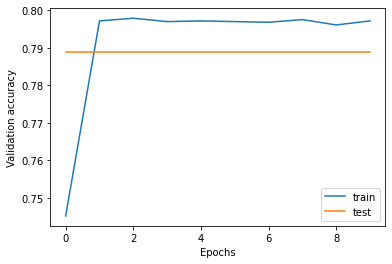

In [28]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Validation accuracy")
plt.legend(['train','test'])


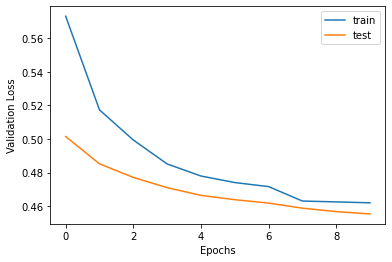

In [29]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel("Validation Loss")
plt.legend(['train','test'])


In [30]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
cm

array([[1607,    0],
       [ 393,    0]], dtype=int64)

In [32]:
print(accuracy_score(y_test,y_pred))

0.8035
